## Proyecto Machine Learning - Predicciones Speed Dating

### **Paso 1: Importar las librerías y funciones y cargar los datos**

##### **Librerías**

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.insert(0, "./src/utils")
import bootcampviztools as viz
import ToolBox as tb


from scipy.io import arff # Necesario para leer los datos, ya que vienen en este formato

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.pipeline import Pipeline, make_pipeline

##### **Datos**
Los datos provienen de un estudio realizado por Columbia Business School a partir de un experimento de *speed dating*, es decir, un evento en el que las personas conocen a otra persona en poco tiempo para decidir si quieren seguir conociéndola y a continuación pasan a conocer a otra persona en el mismo espacio de tiempo.   

En este experimento se organizó un total de 8378 citas rápidas, cada persona tuvo 20 citas en total. Se recogen datos da diversa índole, como las preferencias de cada persona de características de su pareja, la percepción que las personas tienen sobre sí mismas y las expectativas que tienen del evento.

In [166]:
data, meta = arff.loadarff("./src/data_sample/speed_dating.arff") # Cargo los datos en formato arff

In [167]:
meta # Información sobre las variables: tipo y valores únicos

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

In [168]:
data # Datos en forma de array

array([(b'0',  1., b'female', 21., 27., 6., b'[4-6]', b'Asian/Pacific Islander/Asian-American', b'European/Caucasian-American', b'0', 2., 4., b'[2-5]', b'[2-5]', b'Law', 35., 20., 20., 20.,  0.,  5., b'[21-100]', b'[16-20]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]',  6.,  8.,  8.,  8.,  8.,  6., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 15., 20., 20., 15., 15., 15., b'[0-15]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]', b'[0-15]', 6., 8., 8., 8., 7., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 6., 9., 7., 7.,  6.,  5., b'[6-8]', b'[9-10]', b'[6-8]', b'[6-8]', b'[6-8]', b'[0-5]', 9., 2., 8.,  9.,  1.,  1., 5., 1., 5., 6., 9., 1., 10., 10.,  9., 8., 1., b'[9-10]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[9-10]', b'[9-10]', b'[9-10]', b'[6-8]', b'[0-5]',  0.14, b'[0-0.33]',  3.,  2., 4., b'[0-4]', b'[0-3]', b'[3-5]', 7.,  6., b'[6-8]', b'[5-6]', 0., b'1', b'0', b'0'),
       (b'0',  1.,

In [169]:
pd.set_option("display.max_columns", None)
df = pd.DataFrame(data) # Paso los datos a un dataframe
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8

Las columnas de tipo "object" vienen en formato "bytes", me ocuparé de ello en el apartado correspondiente.

In [170]:
df.shape

(8378, 123)

*Los datos cuentan con 8378 instancias y 122 variables más un target, a priori es un volumen suficiente para entrenar un modelo.*

### **Paso 2: Del problema de negocio al de Machine Learning**

##### **Problema de negocio**
La app de citas DatingSuccess va a organizar un evento de *speed dating* y quiere que el mayor número de personas posible hagan *match*, es decir, se gusten mutuamente o quieran seguir conociéndose y, sobre todo, con una experiencia positiva. Con este fin, me han facilitado datos que han obtenido gracias a un experimento realizado por Columbia Business School en un evento de *speed dating*.   

A partir de dichos datos, quieren que elabore un modelo que les permita predecir qué citas tendrán éxito, para organizar en la medida de lo posible, el mayor número de citas en el que ambos participantes se gusten mutuamente.   

Además, para no hacer las pruebas para las predicciones a ciegas, me piden que les diga también cuáles son los aspectos más importantes para que una cita llegue a buen fin.

##### **Problema de Machine Learning**
Dadas las peticiones de negocio, voy a entrenar un algoritmo supervisado de clasificación, en este caso binaria, por la naturaleza del target, que pueda predecir lo mejor posible qué citas van a ser exitosas según los datos proporcionados.   

Por otro lado, será necesario hacer una reducción de features y un análisis de su importancia para poder informar a la empresa sobre los principales aspectos que debe tener en cuenta cuando organice las citas.

### **Paso 3: División en conjuntos train, validation y test**

In [171]:
target = "match" # Todavía no voy a separar X e y, pero me guardo el target en una variable

In [172]:
train, val_test = train_test_split(df, test_size= 0.4, random_state=42) # Me quedo con un test del 40% de los datos para luego sacar el conjunto de validación de ahí
val, test = train_test_split(val_test, test_size= 0.5, random_state=42)

In [173]:
sets_names = ["Train", "Validation", "Test"]
sets = [train, val, test]

In [174]:
for ds, ds_name in zip(sets, sets_names):
    print(f"Dimensiones de {ds_name}: {ds.shape}")

Dimensiones de Train: (5026, 123)
Dimensiones de Validation: (1676, 123)
Dimensiones de Test: (1676, 123)


### **Paso 4: Distribución del Target**

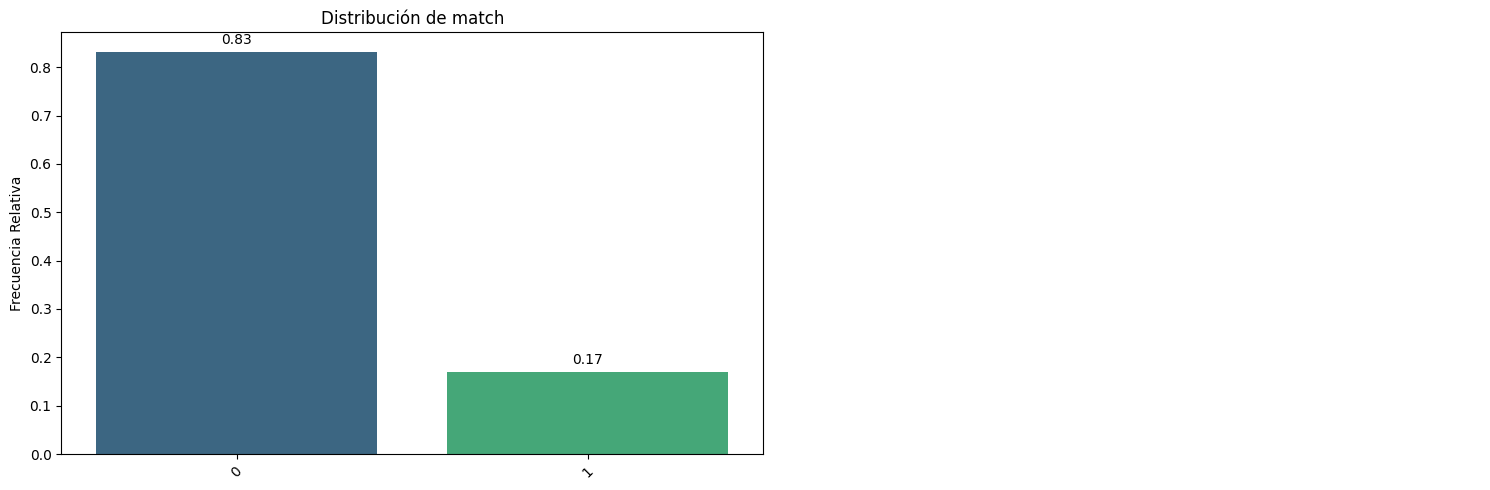

In [175]:
viz.pinta_distribucion_categoricas(train, [target], mostrar_valores=True, relativa=True) # Función de visualización de uno de los módulos que se pueden encontrar en utils

Me encuentro ante un dataset bastante desbalanceado. Hay un número mucho menor de casos de la clase positiva (cita exitosa). Como la clase positiva es la más interesante para negocio, probaré en el momento de tratar los datos y de entrenar y decidir los modelos varios métodos para intentar mitigar los efectos de este desbalanceo.

### **Paso 5: Entender las variables**

Para este paso, son de gran utilidad los metadatos porporcionados en el archivo ARFF. No son datos completos ni contienen una descripción de las variables, pero conociendo el tipo de variable y los valores únicos ya son de ayuda para hacerse una idea general.

In [176]:
meta

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

Puedo observar con un primer vistazo general que hay varias variables binarias, categóricas y, a primer vista, parece que hay numéricas discretas y continuas. Más concretamente se podría apuntar que en la variable "field" hay valores repetidos y algunos que se pueden juntar en grupos más generales o hay variables de las que podemos encontrar tanto la original numérica, como una creada a partir de la misma binneada y convertida en categóricas.

Además, se me ha facilitado una descripción de algunas de las variables, que permite entender tanto las explicadas como el resto, ya que mediante estas descripciones se puede extraer información extrapolable a las demás features de cómo están codificados los nombres de las features:

In [177]:
with open("./src/data_sample/feature_information.txt", "r") as open_file:
    all_text = open_file.read()
    print(all_text)

 * gender: Gender of self  
 * age: Age of self  
 * age_o: Age of partner  
 * d_age: Difference in age  
 * race: Race of self  
 * race_o: Race of partner  
 * samerace: Whether the two persons have the same race or not.  
 * importance_same_race: How important is it that partner is of same race?  
 * importance_same_religion: How important is it that partner has same religion?  
 * field: Field of study  
 * pref_o_attractive: How important does partner rate attractiveness  
 * pref_o_sinsere: How important does partner rate sincerity  
 * pref_o_intelligence: How important does partner rate intelligence  
 * pref_o_funny: How important does partner rate being funny  
 * pref_o_ambitious: How important does partner rate ambition  
 * pref_o_shared_interests: How important does partner rate having shared interests  
 * attractive_o: Rating by partner (about me) at night of event on attractiveness  
 * sincere_o: Rating by partner (about me) at night of event on sincerity  
 * intell

A grandes rasgos, podemos distinguir algunas abreviaturas que se usan:
* Partícula (generalmente sufijo) "\_o": hacen referencia al *partner* o persona con la que se tiene la cita. 
* Empiezan por "d\_": hacen referencia a variables categóricas creadas a partir de una numérica, sin embargo, encontramos "d\_age" y "d\_d\_age", que pueden inducir a error, porque la "d" en la primera y la segunda "d" en la segunda indican "diferencia", por lo que voy a sustituit la "d" por "dif".   

Otro aspecto importante a tener en cuenta a la hora de elegir las features será que hay datos que se han recogido con posterioridad a las citas, estas variables habrá que dejarlas fuera a la hora de construir el modelo, ya que es información con la que la empresa no va a contar a la hora de elegir las personas que tendrán citas. El ejemplo más claro es el de las variables "decision" y "decision_o", que hacen referencia a la decisión de la persona entrevistada con respecto a una cita y a la decisión de la persona con la que ha tenido la cita. Por supuesto, si tenemos esta información sabremos si se ha producido el *match* o no, pero, por desgracia, no podremos contar con esta información antes de que hayan tenido lugar las citas, por lo que habrá que dejar fuera estas variables.

In [178]:
train.rename(columns= {"d_age": "dif_age", "d_d_age": "d_dif_age"}, inplace=True)

Lo primero que voy a hacer es ir examinando las variables una por una con ayuda de su descripción para ver si contienen información que se puede recabar antes de que tengan lugar las citas o no. Las que no lo sean las guardaré en una lista para excluirlas.

In [179]:
train.head(3)

,has_null,wave,gender,age,age_o,dif_age,d_dif_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
2505,b'1',8.0,b'female',24.0,28.0,4.0,b'[4-6]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,b'[0-1]',b'[0-1]',b'Social work',20.45,20.45,20.45,18.18,18.18,2.27,b'[21-100]',b'[21-100]',b'[21-100]',b'[16-20]',b'[16-20]',b'[0-15]',5.0,7.0,7.0,6.0,6.0,6.0,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',20.0,22.5,17.5,22.5,10.0,7.5,b'[16-20]',b'[21-100]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,7.0,9.0,9.0,7.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',7.0,7.0,7.0,7.0,7.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.43,b'[0.33-1]',5.0,NaN,5.0,b'[5-6]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
2620,b'1',9.0,b'female',24.0,23.0,1.0,b'[0-1]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',9.0,9.0,b'[6-10]',b'[6-10]',b'Clinical Psychology',25.64,17.95,15.38,20.51,10.26,10.26,b'[21-100]',b'[16-20]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',4.0,5.0,5.0,4.0,5.0,4.0,b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',16.0,16.0,20.0,16.0,18.0,14.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',9.0,10.0,8.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',10.0,8.0,8.0,8.0,8.0,7.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',-0.07,b'[-1-0]',7.0,NaN,1.0,b'[7-10]',b'[0-3]',b'[0-2]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
4634,b'1',12.0,b'female',27.0,27.0,0.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',1.0,3.0,b'[0-1]',b'[2-5]',b'Elementary Education',17.00,19.00,18.00,17.00,11.00,18.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20]',8.0,9.0,9.0,8.0,7.0,7.0,b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',10.0,20.0,20.0,15.0,20.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[1

In [180]:
print(train.columns.to_list())

['has_null', 'wave', 'gender', 'age', 'age_o', 'dif_age', 'd_dif_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere

In [181]:
columns_to_exclude = ['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'like', 'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision', 'decision_o']

In [182]:
print(f"Nº inicial de variables: {len(train.columns) - 1}")
print(f"Nº real de variables utilizables en el modelo: {len(train.columns) - len(columns_to_exclude + [target])}")

Nº inicial de variables: 122
Nº real de variables utilizables en el modelo: 91


Me sigue quedando un gran número de variables (aunque una gran parte de ellas están tanto en su versión numérica como categórica), pero ya tengo solo las que relamente son posibles features para el modelo. Iré añadiendo variables de las que decida prescindir a esta lista para luego utilizarla en el transformador que incluya en el pipeline que automatice todo el proceso.

De momento en el conjunto que voy a utilizar para el proceso de análisis y transformaciones previos a la construcción del modelo voy a eliminar estas variables.

In [183]:
train_bck = train.copy()
train = train.drop(columns=columns_to_exclude).copy()

#### Análisis de algunos elementos generales del dataset:

Como he apuntado al cargar los datos, hay variables que aparecen en formato bytes, por lo que lo primero que voy a hacer es forzar los tipos.

In [184]:
train.head(3)

,has_null,wave,gender,age,age_o,dif_age,d_dif_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,match
2505,b'1',8.0,b'female',24.0,28.0,4.0,b'[4-6]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,b'[0-1]',b'[0-1]',b'Social work',20.45,20.45,20.45,18.18,18.18,2.27,b'[21-100]',b'[21-100]',b'[21-100]',b'[16-20]',b'[16-20]',b'[0-15]',20.0,22.5,17.5,22.5,10.0,7.5,b'[16-20]',b'[21-100]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,7.0,9.0,9.0,7.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.43,b'[0.33-1]',5.0,NaN,5.0,b'[5-6]',b'[0-3]',b'[3-5]',b'0'
2620,b'1',9.0,b'female',24.0,23.0,1.0,b'[0-1]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',9.0,9.0,b'[6-10]',b'[6-10]',b'Clinical Psychology',25.64,17.95,15.38,20.51,10.26,10.26,b'[21-100]',b'[16-20]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',16.0,16.0,20.0,16.0,18.0,14.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',9.0,10.0,8.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',-0.07,b'[-1-0]',7.0,NaN,1.0,b'[7-10]',b'[0-3]',b'[0-2]',b'0'
4634,b'1',12.0,b'female',27.0,27.0,0.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',1.0,3.0,b'[0-1]',b'[2-5]',b'Elementary Education',17.00,19.00,18.00,17.00,11.00,18.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20]',10.0,20.0,20.0,15.0,20.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20]',b'[0-15]',5.0,8.0,7.0,8.0,8.0,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',10.0,8.0,10.0,9.0,8.0,9.0,10.0,1.0,5.0,10.0,7.0,10.0,10.0,8.0,10.0,9.0,3.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',b'[0-5]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[0-5]',0.40,b'[0.33-1]',3.0,NaN,2.0,b'[0-4]',b'[0-3]',b'[0-2]',b'0'


In [185]:
train.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
                                    ...   
expected_num_matches               float64
d_expected_happy_with_sd_people     object
d_expected_num_interested_in_me     object
d_expected_num_matches              object
match                               object
Length: 92, dtype: object

In [186]:
train.dtypes.value_counts()

object     48
float64    44
Name: count, dtype: int64

Las columnas decimales tienen el tipo adecuado, sin embargo, las que contienen números enteros se leen como "object" porque se detectan como si fueran de tipo "bytes"  y las que son de tipo "string", aunque aparezcan con el formato "object", que es su tipo habitual, también se está detectando como si fueran de tipo "bytes", habrá que forzar ambos tipos de variables.

In [187]:
for ds in [train, train_bck, val, test]: # Los fuerzo ya en todos los conjuntos (train_bck) es el conjunto con todas las variables que luego voy a pasar por el pipeline
    for col in ds:
        if ds[col].dtype == object:
            try:
                ds[col] = ds[col].astype(int) # Si es posible convertirla a entero, se convierte a entero, si no a string
            except:
                ds[col] = ds[col].astype(str)

In [188]:
train.dtypes.value_counts()

object     45
float64    44
int64       3
Name: count, dtype: int64

In [189]:
train.head(3)

,has_null,wave,gender,age,age_o,dif_age,d_dif_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,match
2505,1,8.0,female,24.0,28.0,4.0,[4-6],European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,[0-1],[0-1],Social work,20.45,20.45,20.45,18.18,18.18,2.27,[21-100],[21-100],[21-100],[16-20],[16-20],[0-15],20.0,22.5,17.5,22.5,10.0,7.5,[16-20],[21-100],[16-20],[21-100],[0-15],[0-15],9.0,7.0,9.0,9.0,7.0,[9-10],[6-8],[9-10],[9-10],[6-8],9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,[9-10],[6-8],[6-8],[9-10],[6-8],[6-8],[9-10],[9-10],[9-10],[6-8],[6-8],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.43,[0.33-1],5.0,NaN,5.0,[5-6],[0-3],[3-5],0
2620,1,9.0,female,24.0,23.0,1.0,[0-1],European/Caucasian-American,European/Caucasian-American,1,9.0,9.0,[6-10],[6-10],Clinical Psychology,25.64,17.95,15.38,20.51,10.26,10.26,[21-100],[16-20],[16-20],[21-100],[0-15],[0-15],16.0,16.0,20.0,16.0,18.0,14.0,[16-20],[16-20],[16-20],[16-20],[16-20],[0-15],9.0,10.0,8.0,10.0,10.0,[9-10],[9-10],[6-8],[9-10],[9-10],8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,[6-8],[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],[6-8],[6-8],[9-10],[9-10],[6-8],[9-10],[0-5],[6-8],[9-10],[0-5],-0.07,[-1-0],7.0,NaN,1.0,[7-10],[0-3],[0-2],0
4634,1,12.0,female,27.0,27.0,0.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,1.0,3.0,[0-1],[2-5],Elementary Education,17.00,19.00,18.00,17.00,11.00,18.00,[16-20],[16-20],[16-20],[16-20],[0-15],[16-20],10.0,20.0,20.0,15.0,20.0,15.0,[0-15],[16-20],[16-20],[0-15],[16-20],[0-15],5.0,8.0,7.0,8.0,8.0,[0-5],[6-8],[6-8],[6-8],[6-8],10.0,8.0,10.0,9.0,8.0,9.0,10.0,1.0,5.0,10.0,7.0,10.0,10.0,8.0,10.0,9.0,3.0,[9-10],[6-8],[9-10],[9-10],[6-8],[9-10],[9-10],[0-5],[0-5],[9-10],[6-8],[9-10],[9-10],[6-8],[9-10],[9-10],[0-5],0.40,[0.33-1],3.0,NaN,2.0,[0-4],[0-3],[0-2],0


El tipo de las variables que contienen valores enteros ya ha cambiado y el de los strings, como ya anticipaba, sigue siendo "object", pero si vemos el dataframe, ahora ha dejado de aparecer esa "b'...'", que indicaba que era de tipo "bytes".

In [190]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
has_null,5026.0,0.880223,0.324733,0.00,1.00,1.00,1.00,1.0
wave,5026.0,11.412853,5.975444,1.00,7.00,11.00,15.00,21.0
age,4971.0,26.337156,3.565679,18.00,24.00,26.00,28.00,55.0
age_o,4967.0,26.369438,3.562714,18.00,24.00,26.00,28.00,55.0
dif_age,5026.0,4.177278,4.572534,0.00,1.00,3.00,5.00,37.0
samerace,5026.0,0.395742,0.489058,0.00,0.00,0.00,1.00,1.0
importance_same_race,4985.0,3.758877,2.822184,0.00,1.00,3.00,6.00,10.0
importance_same_religion,4985.0,3.624674,2.802657,1.00,1.00,3.00,6.00,10.0
pref_o_attractive,4978.0,22.546452,12.405819,0.00,15.00,20.00,25.00,100.0
pref_o_sincere,4978.0,17.356943,6.824764,0.00,15.00,18.18,20.00,60.0


A priori no se ve nada que llame demasiado la atención. Quizá podría parecer que en algunas variables ha habido imputación de nulos, ya que algunas como la importancia que se le da a ciertas cualidades de la otra persona no parece común que tengan valores 0, pero muchas de esas variables también tienen nulos, por lo que podemos descartar que esos 0 sean imputaciones.

In [191]:
train.describe(include="object").T

,count,unique,top,freq
gender,5026,2,female,2561
d_dif_age,5026,4,[2-3],1453
race,5026,6,European/Caucasian-American,2801
race_o,5026,6,European/Caucasian-American,2843
d_importance_same_race,5026,3,[2-5],1914
d_importance_same_religion,5026,3,[0-1],1875
field,5026,260,Business,309
d_pref_o_attractive,5026,3,[21-100],1839
d_pref_o_sincere,5026,3,[16-20],2315
d_pref_o_intelligence,5026,3,[16-20],2557


En relación con las variables categóricas, llama la atención a primera vista que la variable "field" tenga 260 valores únicos. Como ya había apuntado, habrá que tratarlas y agrupar valores en grupos más genéricos.   

Además, nos encontramos con que ninguna de las categóricas generadas a partir de las numéricas tiene nulos, mientras que muchas de estas numéricas sí que tienen. Tendré que investigar qué se ha hecho con estos nulos cuando los analice más adelante.

In [192]:
tb.describe_df(train)

,has_null,wave,gender,age,age_o,dif_age,d_dif_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,match
DATA_TYPE,int64,float64,object,float64,float64,float64,object,object,object,int64,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,int64
MISSINGS (%),0.0,0.0,0.0,0.010943,0.011739,0.0,0.0,0.0,0.0,0.0,0.008158,0.008158,0.0,0.0,0.0,0.00955,0.00955,0.00955,0.010545,0.011739,0.014326,0.0,0.0,0.0,0.0,0.0,0.0,0.008158,0.008158,0.008158,0.009152,0.010545,0.012535,0.0,0.0,0.0,0.0,0.0,0.0,0.011739,0.011739,0.011739,0.011739,0.011739,0.0,0.0,0.0,0.0,0.0,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.008158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017111,0.0,0.010744,0.790688,0.140669,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,21,2,24,24,35,4,6,6,2,11,10,3,3,260,94,78,65,71,82,85,3,3,3,3,3,3,94,78,65,71,82,85,3,3,3,3,3,3,9,9,9,8,9,3,3,3,3,3,10,10,10,10,11,11,11,12,11,11,10,11,10,11,10,10,11,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,152,3,10,18,17,3,3,3,2
CARDIN (%),0.000398,0.004178,0.000398,0.004775,0.004775,0.006964,0.000796,0.001194,0.001194,0.000398,0.002189,0.00199,0.000597,0.000597,0.051731,0.018703,0.015519,0.012933,0.014127,0.016315,0.016912,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.018703,0.015519,0.012933,0.014127,0.016315,0.016912,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.001791,0.001791,0.001791,0.001592,0.001791,0.000597,0.000597,0.000597,0.000597,0.000597,0.00199,0.00199,0.00199,0.00199,0.002189,0.002189,0.002189,0.002388,0.002189,0.002189,0.00199,0.002189,0.00199,0.002189,0.00199,0.00199,0.002189,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.030243,0.000597,0.00199,0.003581,0.003382,0.000597,0.000597,0.000597,0.000398


Se observan unas cardinalidades en general bastante bajas, incluso en las numéricas, ya que todas están en un rango de valores acotados y aunque sean de tipo "float", la mayoría de sus valores son enteros.

### **Paso 6: Reducción preliminar de features**

Al tener una gran cantidad de features, con objeto de simplificar el análisis, voy a hacer una selección preliminar de features. Salvo variables que claramente no aporten nada o tengan un porcentaje muy elevado de nulos, haré una selección combinando métodos basados en modelos y en tests estadísticos.

##### **Por porcentaje de faltantes**

Compruebo las columnas con más de un 40% de valores nulos.

In [193]:
report = tb.describe_df(train).T
report.loc[report["MISSINGS (%)"]> 0.2]

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
expected_num_interested_in_me,float64,0.790688,18,0.003581


Solo hay una, que además tiene un 80% de valores nulos, por lo que me voy a deshacer de ella por estar demasiado desinformada. Además, hay una columna categórica creada a partir de ella. Voy a comprobar si es informativa con respecto al target y si no la eliminaré también, ya que se ha creado a partir de una variable con una información muy escasa.

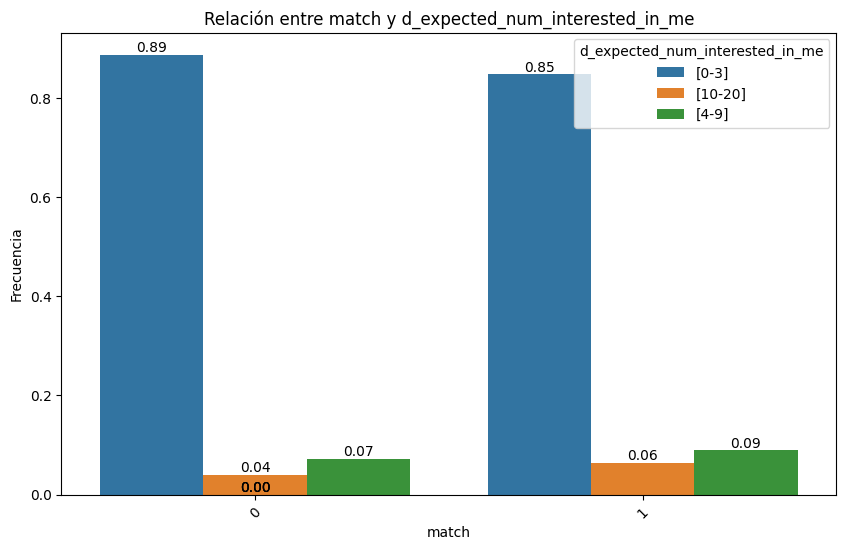

In [194]:
viz.plot_categorical_relationship_fin(train, target, "d_expected_num_interested_in_me", relative_freq=True, show_values=True)

Por cómo se distribuyen los valores, parece que los nulos se han contabilizado como 0, o por lo menos en la categoría de 0 a 3. No parece que discrimine mucho con respecto a target, con todo, lo voy a comprobar mediante el coeficiente de información mutua.

In [195]:
mutual_info_score(train[target], train.d_expected_num_interested_in_me)

np.float64(0.0011752745156286548)

Dado que tiene un valor muy cercano a cero y dadas las circunstancias en las que se ha creado la variable, voy a prescindir de las dos.

In [196]:
for col in train:
    if col.__contains__("interested_in_me"):
        train.drop(columns = col, inplace= True) # De train las elimino ya
        columns_to_exclude.append(col) # Las añado también a mi lista de columnas para excluir que voy a utilizar en el pipeline

In [197]:
train.shape

(5026, 90)

#### **has_null**

Es una variable que realmente aporta muy poco, ya que lo que más me interesa es saber si una variable tiene nulos o no, no si una fila los tiene o no. Si voy a eliminar alguna fila por tener nulos, será porque tenga una cantidad determinada o en unas variables determinadas, así que esta información es de muy poco valor, me deshago de ella.

In [198]:
train.drop(columns="has_null", inplace = True)
columns_to_exclude.append("has_null")

#### **Selección de features**